# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [114]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [115]:
# read the data
data = pd.read_csv('/content/foodhub_order.csv')
# returns the first 5 rows
data.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [116]:
# Write your code here
print('There are', data.shape[0],'rows and', data.shape[1], 'columns.')

There are 1898 rows and 9 columns.


#### Observations:
* The context shows we have 1898 rows of data in 9 columns

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [117]:
# Use info() to print a concise summary of the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
* There are 5 numerical cloumns in the data and 4 object type cloumns.
* rating column is being read as object type but it should be a numerical column.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [118]:
# Write your code here
data.isna().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

In [119]:
#checking why rating was stored as object
data['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

In [120]:
#looking at the rating that has missing value 'not given' need to be changed to a float
data['rating'].apply(type).value_counts()

rating
<class 'str'>    1898
Name: count, dtype: int64

In [121]:
#let's replace such data point with null values
data['rating']=data['rating'].replace(['Not given'],np.nan)
data['rating']=data['rating'].astype(float)

In [122]:
data['rating'].dtype

dtype('float64')

In [124]:
#checking the data again
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1162 non-null   float64
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 133.6+ KB


#### Observations:
* Now the data type of rating column has been fixed and considered as float after the 'not given' were read as nan.
* Now there are 6 numerical columns, 3 object type columns in this data.
* We observe that some columns have less entries than other columns (less than 1989 rows) which indcates the presence of missing value in the data.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [125]:
# Write your code here
data.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
rating,1162.0,4.344234e+00,0.741478,3.00,4.00,5.00,5.000000e+00,5.00
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations:
* cost of the order: the min cost is 4.47 and the median is 14.14 also, the 75% of the data indicate that might require a quick check and also shows the different between the max and the 75% is huge it might be an indication of an outlier.
* food preparation time: the average needs a quick check and the min is 20 mins and the max is 35 min
* delivery time: the median is 25 mins and the max is 33 mins

### **Question 5:** How many orders are not rated? [1 mark]

In [126]:
# Write the code here
data['rating'].value_counts(dropna=False)

rating
NaN    736
5.0    588
4.0    386
3.0    188
Name: count, dtype: int64

#### Observations:
* the data shows 736 orders that have not giving any rate.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [127]:
# Write the code here
# observation on order ID
data['order_id'].unique()


array([1477147, 1477685, 1477070, ..., 1477819, 1477513, 1478056])

In [128]:
# observation on customer id
data['customer_id'].value_counts()

customer_id
52832     13
47440     10
83287      9
250494     8
259341     7
          ..
385426     1
254913     1
289597     1
74412      1
397537     1
Name: count, Length: 1200, dtype: int64

#### Observations:
* the data shows some customers ordered more than 1 time.

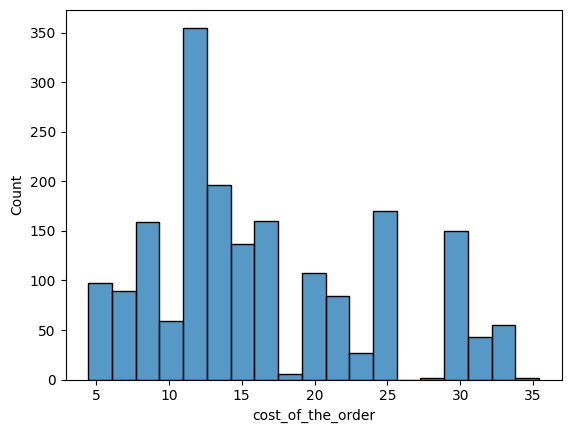

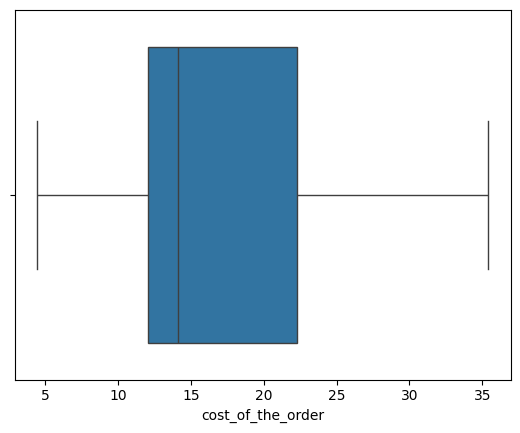

In [129]:
# observation on cost of order
sns.histplot(data=data, x='cost_of_the_order')
plt.show()
sns.boxplot(data=data, x='cost_of_the_order')
plt.show()

### Observations:
* there is no outliers showing in this plot and it's right skewed.
* the min cost of the order is 4.47, and the median is 14.14.

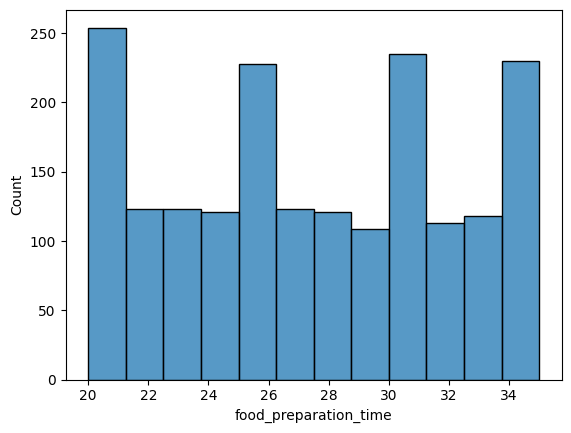

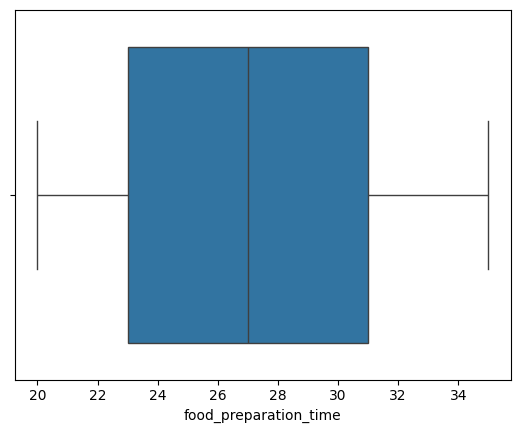

In [130]:
# observation on food_preparation_time
sns.histplot(data=data, x='food_preparation_time')
plt.show()
sns.boxplot(data=data, x='food_preparation_time')
plt.show()

### Observations:
* there is no outliers showing in this plot and no skewed.
* the median food preparation time is 27 mins.

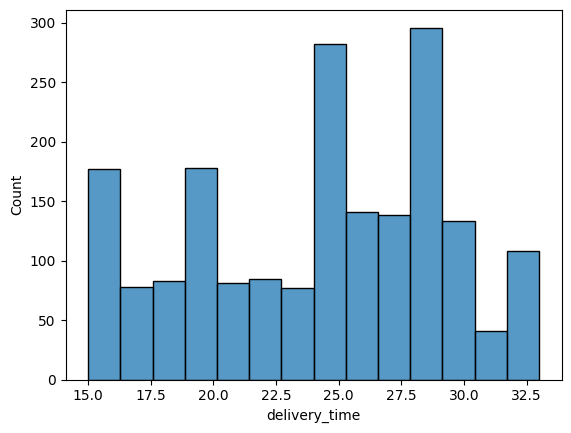

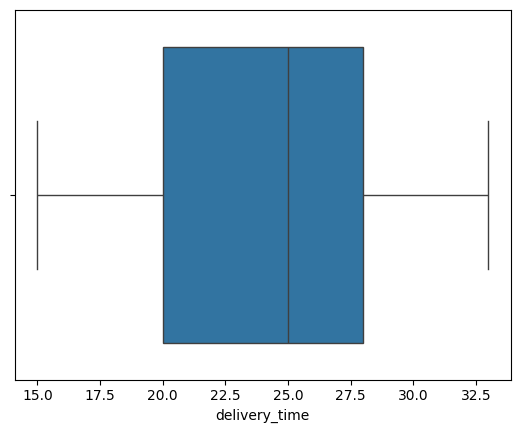

In [131]:
# observation on delivery time

sns.histplot(data=data, x= 'delivery_time')
plt.show()
sns.boxplot(data=data, x='delivery_time')
plt.show()

### Observations:
* there is no outliers showing in this plot and no skewed.
* the median delivery time is 25 mins.

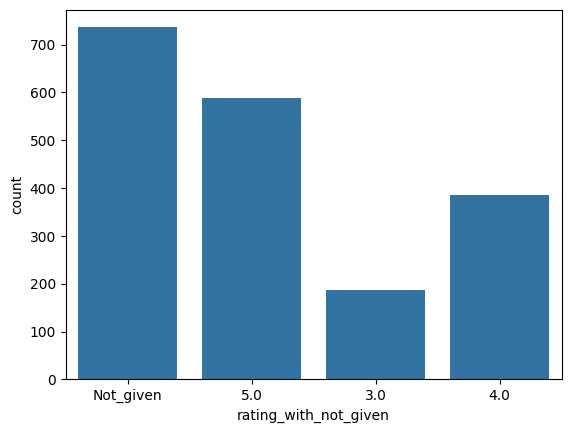

In [132]:
# observation on rating
data['rating_with_not_given']= data['rating'].astype('object').fillna('Not_given')

sns.countplot(data = data, x = 'rating_with_not_given');

### Observations:
* This plot showing the non giving rate is the highest.
* the min rating is 3.

In [133]:
# observation on restaurant_name
data['restaurant_name'].value_counts()

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: count, Length: 178, dtype: int64

### Observations:
* This context shows the top 5 resturant name with the most order numbers.


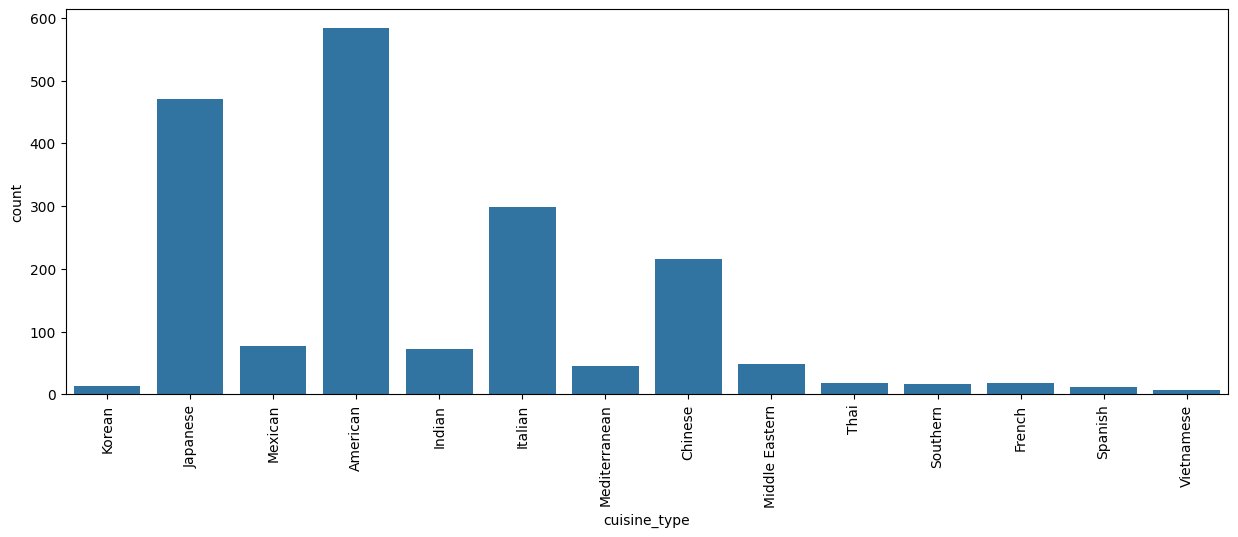

In [134]:
#Observation on cuisine_type

plt.figure(figsize = (15,5))
#using countplot
sns.countplot(data = data, x = 'cuisine_type')
plt.xticks(rotation=90);

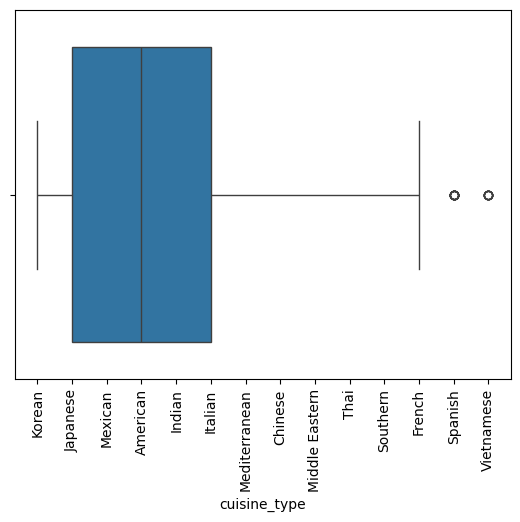

In [135]:
#using the box plot
sns.boxplot(data=data, x='cuisine_type')
plt.xticks(rotation=90);

In [136]:
data['cuisine_type'].value_counts()

cuisine_type
American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: count, dtype: int64

### Observations:
* there are outliers showing in this plot (Spanish,Vietnamese) and it's right skewed.
* American cuisine has the most request then Japanese.

In [137]:
#Observation on day of the week
data['day_of_the_week'].value_counts()

day_of_the_week
Weekend    1351
Weekday     547
Name: count, dtype: int64

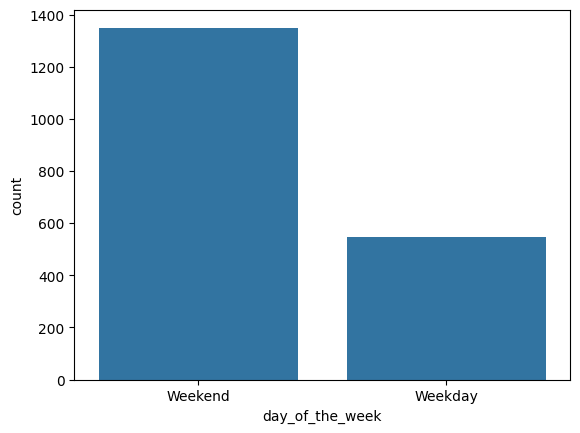

In [142]:
#using countplot
sns.countplot(data = data, x = 'day_of_the_week');

### Observations:
* the weekedn has the most order.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [140]:
# Write the code here
data['restaurant_name'].value_counts().head()

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64

#### Observations:
* Shake Shack is the higest resturatnt in terms of the number of orders received.


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [203]:
#checking the unique value
data_weekend = data[data['day_of_the_week'] == 'Weekend']
print('The most popular cuisine on weekends is:', data_weekend['cuisine_type'].mode())

The most popular cuisine on weekends is: 0    American
Name: cuisine_type, dtype: object


#### Observations:
*American is the most popular cuisine on weekends.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [218]:
# Write the code here
#getting the total orders that cost more than 20 dollars
order_greater_than_20 = data[data['cost_of_the_order']>20]
print('The total numbers of order that cost more than 20 dollars is:',order_greater_than_20.shape[0])
#getting the percentage
percentage= (order_greater_than_20.shape[0]/data.shape[0]*100)
print('The percentage of the orders cost more than 20 dollars is:',round(percentage,2),'%')

The total numbers of order that cost more than 20 dollars is: 555
The percentage of the orders cost more than 20 dollars is: 29.24 %


#### Observations:
*the percentage is 29.2%.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [219]:
# Write the code here
mean_delivery_time= data['delivery_time'].mean()
print('the mean order delivery time is:', round(mean_delivery_time,2),'mins')

the mean order delivery time is: 24.16 mins


#### Observations:
*the mean delivey time is 24 mins.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [222]:
# Write the code here
data['customer_id'].value_counts().head(3)

customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64

#### Observations:
*the context shows the top 3 customers and number of orders they placed.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


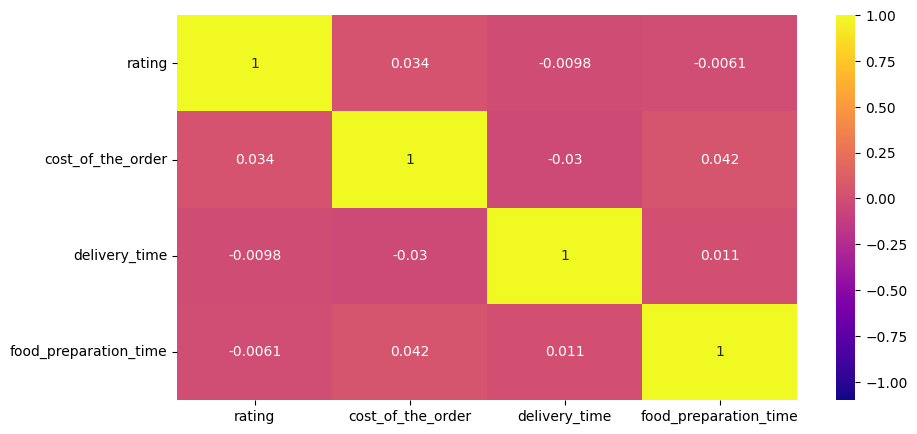

In [235]:
# Write the code here
#let's check the correlation between the different variable in the data
correl_list=['rating','cost_of_the_order','delivery_time','food_preparation_time']
plt.figure(figsize=(10,5))
sns.heatmap(data[correl_list].corr(),annot=True, cmap='plasma', vmin=1,vmax=-1)
plt.show()


#### Observations:
* the plot shows there is a negative correlation between the delivery time and rating, this indicate that when the delivery time increase and the rating will decrease.
* the plot shows a positive correlation between cost of the order and food preparation time

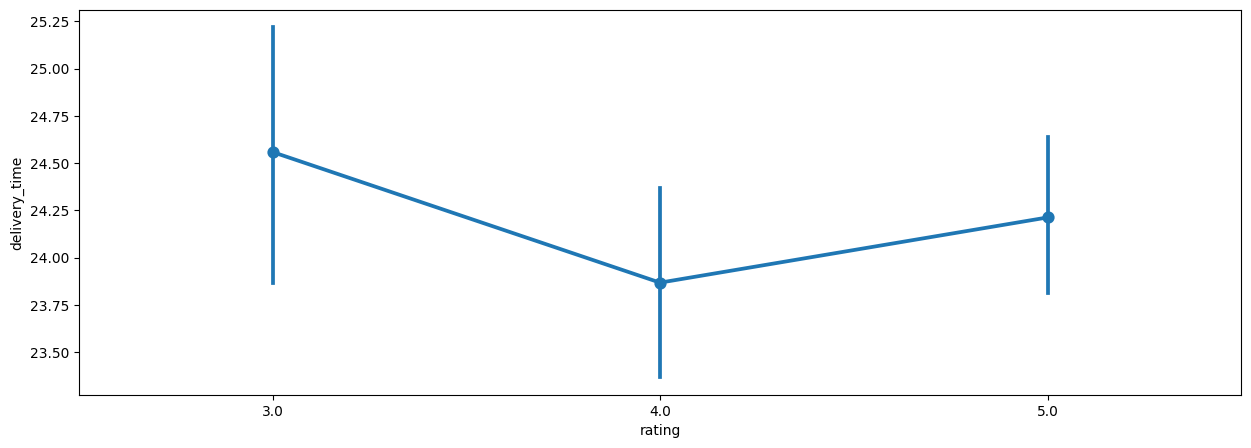

In [270]:
#let's check the correlation between the delivery time and rating
plt.figure(figsize=(15,5))
data['rating_with_not_given']= data['rating'].astype('object').fillna('Not_given')
sns.pointplot(x='rating', y='delivery_time', data=data)
plt.show()

#### Observations:
* this context shows that when the delivery time increase and the rating will decrease.

<ipython-input-266-ca445e5baa84>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='food_preparation_time', y='cost_of_the_order', palette = 'coolwarm', data=data)


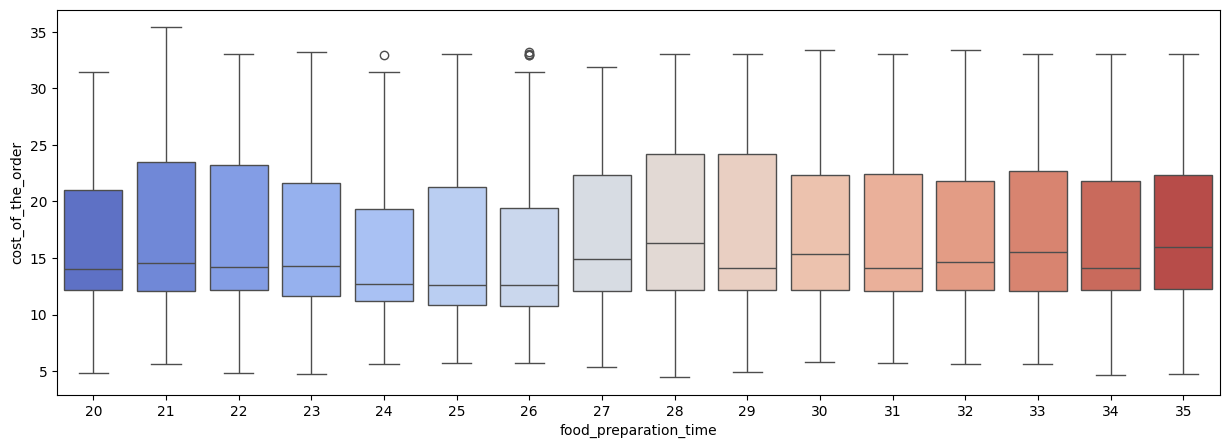

In [266]:
#let's check the correlation between cost of the order and food preparation time
plt.figure(figsize=(15,5))
sns.boxplot(x='food_preparation_time', y='cost_of_the_order', palette = 'coolwarm', data=data)
plt.show();

#### Observations:
* this plot shows some outliers when the cost is low and the time for preparation is around 26 mins

<ipython-input-272-1bfadbaece53>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cuisine_type', y='cost_of_the_order', palette = 'magma', data=data)


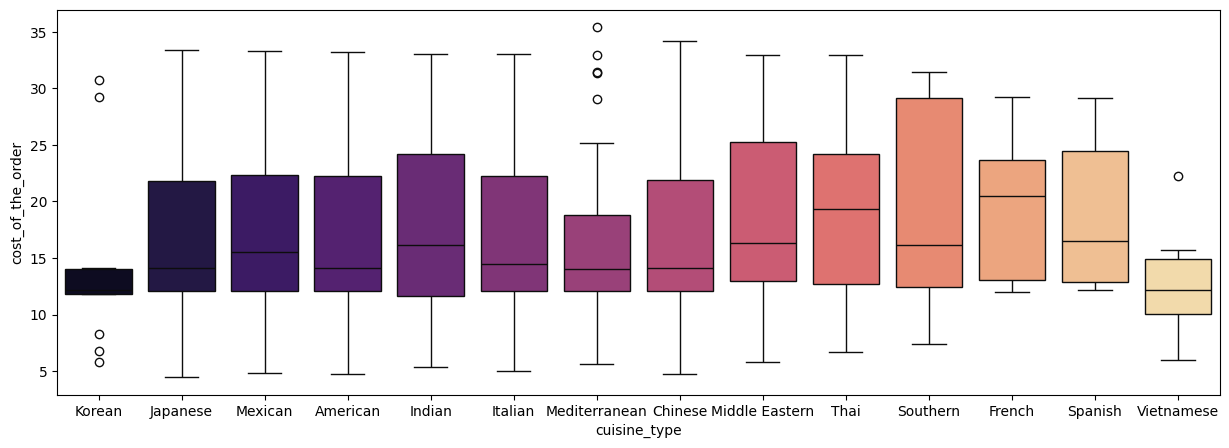

In [272]:
#let's check the correlation between numerical and categorical variables
#let's check the correlation between the cuisine type and cost of the order
plt.figure(figsize=(15,5))
sns.boxplot(x='cuisine_type', y='cost_of_the_order', palette = 'magma', data=data)
plt.show();

#### Observations:
* this plot shows mediterranean and Korean and Vietnamese has some outliers.
* also Korean has the lower median cost and smaller IQR to the others.
* Mexican,Ameerican,and Indian have similler distrubution with moderate IQR and median.

<ipython-input-284-f9dca73ffc96>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='day_of_the_week', y='delivery_time', palette = 'coolwarm', data=data)


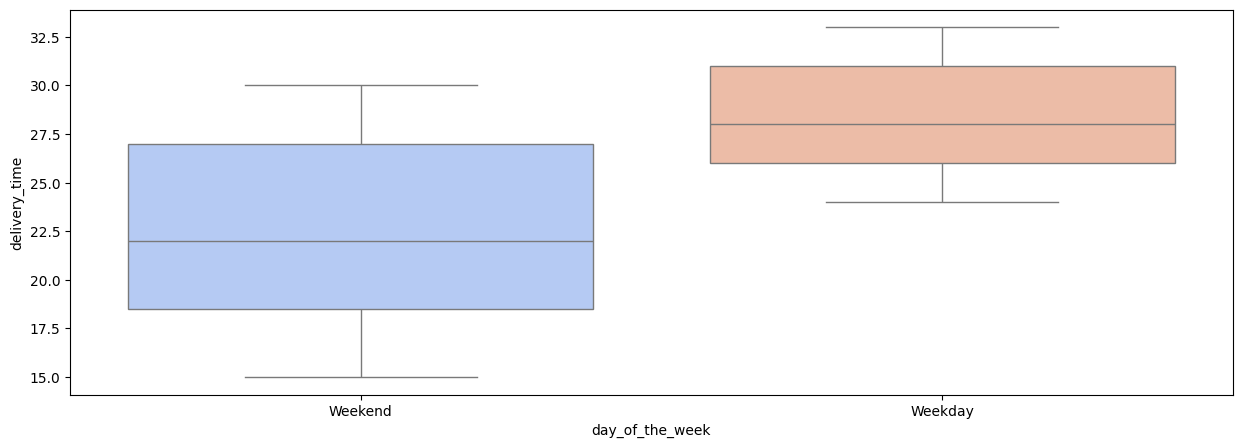

In [284]:
#let's check the correlation between the delivery time and day of the week
plt.figure(figsize=(15,5))
sns.boxplot(x='day_of_the_week', y='delivery_time', palette = 'coolwarm', data=data)
plt.show();

#### Observations:
* this plot shows weekday has higer delivery time than weekend.

<ipython-input-282-af7e489a3933>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='cuisine_type', y='food_preparation_time', palette = 'coolwarm', data=data)


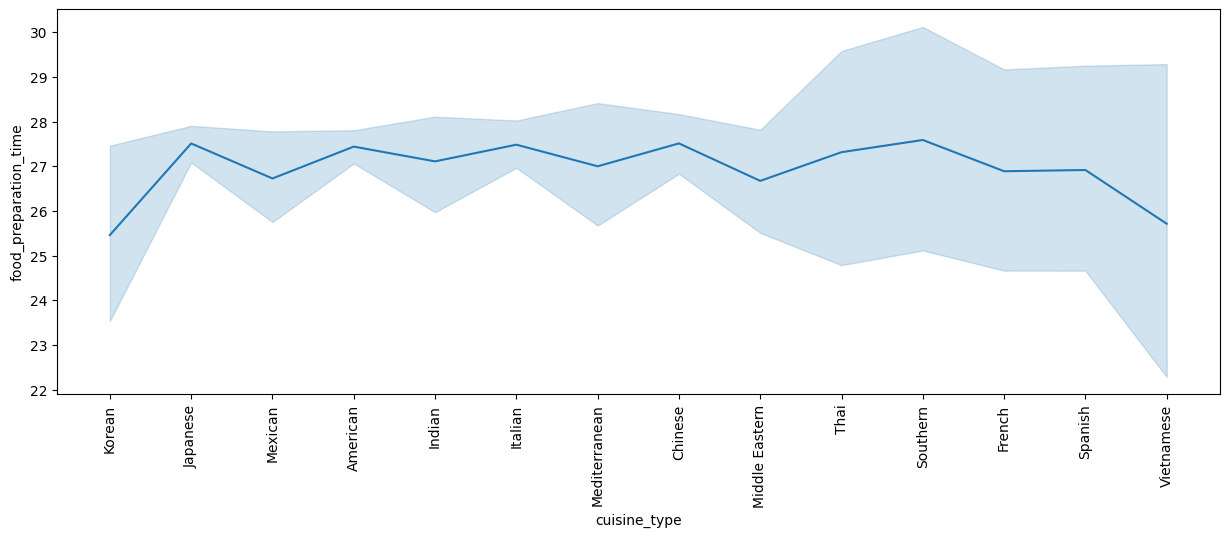

In [282]:
#let's check the correlation between the cuisine type and food preparation time
plt.figure(figsize=(15,5))
sns.lineplot(x='cuisine_type', y='food_preparation_time', palette = 'coolwarm', data=data)
plt.xticks(rotation = 90)
plt.show();

#### Observations:
* this plot shows  Korean and Vietnamese have less time among the other cuisines.
* also most of the cuisine has less than 29mins to be prepared.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [305]:
# Write the code here
data_restaurant = data.groupby('restaurant_name').agg(
rating_count= ('rating','size'),
avg_rating=('rating','mean')
).reset_index()
all_rest = data_restaurant[(data_restaurant['rating_count']>50)&
 (data_restaurant['avg_rating']>4)
 ]
print(all_rest)

               restaurant_name  rating_count  avg_rating
20   Blue Ribbon Fried Chicken            96    4.328125
21           Blue Ribbon Sushi           119    4.219178
109                       Parm            68    4.128205
121           RedFarm Broadway            59    4.243902
122             RedFarm Hudson            55    4.176471
136                Shake Shack           219    4.278195
153          The Meatball Shop           132    4.511905


#### Observations:
* The meatball shop has the highest rating 4.5
* Shake Shack has the highest rating count 219

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [321]:
# Write the code here
#using if
def net_revenue(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0
        return x*0
data['revenue']= data['cost_of_the_order'].apply(net_revenue)
net_revenue = data['revenue'].sum()
print('The total net revenue is:',net_revenue,'dollars')

The total net revenue is: 6166.303 dollars


#### Observations:
*The most revenue comes from the order that cost more than 20 dollars

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [329]:
# Write the code here
#getting the total time for both
data['total_time'] = data['food_preparation_time'] + data['delivery_time']
data_more_than_60 = data[data['total_time'] > 60]
print('The total of orders that has more than 60 mins of total delivery time is:', data_more_than_60.shape[0])
#getting the percentage
percentage = (data_more_than_60.shape[0] / data.shape[0]) * 100
print('The percentage of order that has more than 60 mins of total delivery time is:', round(percentage, 2), '%')

The total of orders that has more than 60 mins of total delivery time is: 200
The percentage of order that has more than 60 mins of total delivery time is: 10.54 %


#### Observations:


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [331]:
# Write the code here
#mean delivery time during the weekday
print('The mean delivery time on weekdays is around',
      round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()),
     'minutes')


#mean delivery time during the weekend
print('The mean delivery time on weekends is around',
      round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()),
      'minutes')


The mean delivery time on weekdays is around 28 minutes
The mean delivery time on weekends is around 22 minutes


#### Observations:
* the context shows the mean delivery time for the weekdays and weekend, looks like it is higher in weekdays.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  customer feedback rating provide insights into their satisfaction, the higher the rate the lesser the delivery time.
* some cuisines have higher preprartion time which will add more time to the delivery and less customer satisfaction.


### Recommendations:

*  Since the weekend has more demand it might be better for the foodhub to have more drivers and for the restaurant to have more staff.
* adding more dishes to the most popular restaurant will increase the revenue.
* utilize a better technology with meachine learning algorirthem to help with the peak time and identify any error or missing rate.
* running some marking during the weekday and offer discount will have more sale in weekdays.

---